### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [1]:
import pandas as pd

In [2]:
# место для кода
data=pd.read_csv('Data_Dictionary.txt', sep=";")
data.head()

,Field Name\t\t\t\tDefinition
0,RefID\t\t\t\t Unique (sequential) numbe...
1,IsBadBuy\t\t\t\tIdentifies if the kicked vehic...
2,PurchDate\t\t\t\tThe Date the vehicle was Purc...
3,Auction\t\t\t\t\tAuction provider at which the...
4,VehYear\t\t\t\t\tThe manufacturer's year of th...


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

df= pd.read_csv('data (2).csv')
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


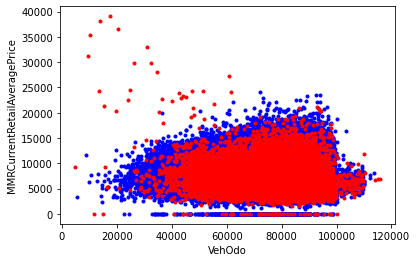

In [3]:
# место для кода

x =df[(df.IsBadBuy==0)]['VehOdo']
y = df[(df.IsBadBuy==0)]['MMRCurrentRetailAveragePrice']
 # параметр fit_reg - строит линию регрессии для двух выборок
plt.scatter(x, y, marker='.',color='b')
plt.xlabel('VehOdo')
plt.ylabel('MMRCurrentRetailAveragePrice')
#plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
x =df[(df.IsBadBuy==1)]['VehOdo']
y = df[(df.IsBadBuy==1)]['MMRCurrentRetailAveragePrice']
 # параметр fit_reg - строит линию регрессии для двух выборок
plt.scatter(x, y, marker='.',color='r')
plt.xlabel('VehOdo')
plt.ylabel('MMRCurrentRetailAveragePrice')
#plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить? - Проблема, что датасет имеет пропуски. Их нужно заполнить или удалить с помощью функций `.fillna()`,`.isnull()`, `.dropna()`

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [4]:
df.loc[pd.isnull(df.VehOdo), 'VehOdo']=0
df.loc[pd.isnull(df['MMRCurrentRetailAveragePrice']), 'MMRCurrentRetailAveragePrice']=0

In [5]:
from sklearn import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np

In [6]:
VehOdo = np.array(df.VehOdo).reshape(-1,1)
MMRCurrentRetailAveragePrice = np.array(df.MMRCurrentRetailAveragePrice).reshape(-1,1)

In [7]:
model = LinearRegression()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    VehOdo,
    MMRCurrentRetailAveragePrice,
    test_size = 0.2
)

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
model.score(X_train, y_train)

0.00043328437666600994

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [11]:
# место для кода
prediction = model.predict(y_train)
print(prediction.mean())

8453.77133028811


## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [12]:
# место для кода
prediction = [1 if prediction[i] > prediction.mean() else 0 for i in range(len(prediction))]

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [13]:
# место для кода
print(metrics.classification_report(prediction,y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04     29395
         1.0       0.00      0.00      0.00     28991
       899.0       0.00      0.00      0.00         0
       964.0       0.00      0.00      0.00         0
       968.0       0.00      0.00      0.00         0
      1218.0       0.00      0.00      0.00         0
      1285.0       0.00      0.00      0.00         0
      1292.0       0.00      0.00      0.00         0
      1370.0       0.00      0.00      0.00         0
      1374.0       0.00      0.00      0.00         0
      1449.0       0.00      0.00      0.00         0
      1468.0       0.00      0.00      0.00         0
      1485.0       0.00      0.00      0.00         0
      1505.0       0.00      0.00      0.00         0
      1557.0       0.00      0.00      0.00         0
      1584.0       0.00      0.00      0.00         0
      1624.0       0.00      0.00      0.00         0
      1625.0       0.00    

In [14]:
print(metrics.confusion_matrix(prediction,y_train))

[[657   0   1 ...   0   0   0]
 [  0   0   0 ...   1   1   1]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]



# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [15]:
from sklearn import tree

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    VehOdo,
    MMRCurrentRetailAveragePrice,
    test_size = 0.2
)

In [17]:
model=tree.DecisionTreeClassifier(max_depth=20)

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [19]:
model.score(X_train, y_train)

0.13996506011715137

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [25]:
# место для кода
proba = model.predict_proba(X_train)
print(proba)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.05882353 0.         0.         ... 0.         0.         0.        ]
 [0.00255754 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.01481481 0.         0.         ... 0.         0.         0.        ]
 [0.00524934 0.         0.         ... 0.         0.         0.        ]]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [26]:
prediction=model.predict(X_train)

In [27]:
# место для кода
prediction = [1 if prediction[i].any() >  prediction.mean() else 0 for i in range(len(prediction))]


In [28]:
print(metrics.classification_report(prediction,y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      0.01      0.02     58386
       899.0       0.00      0.00      0.00         0
       964.0       0.00      0.00      0.00         0
       968.0       0.00      0.00      0.00         0
      1285.0       0.00      0.00      0.00         0
      1292.0       0.00      0.00      0.00         0
      1299.0       0.00      0.00      0.00         0
      1363.0       0.00      0.00      0.00         0
      1370.0       0.00      0.00      0.00         0
      1374.0       0.00      0.00      0.00         0
      1415.0       0.00      0.00      0.00         0
      1468.0       0.00      0.00      0.00         0
      1505.0       0.00      0.00      0.00         0
      1557.0       0.00      0.00      0.00         0
      1584.0       0.00      0.00      0.00         0
      1625.0       0.00      0.00      0.00         0
      1634.0       0.00      0.00      0.00         0
      1655.0       0.00    

In [29]:
print(metrics.confusion_matrix(prediction,y_train))

[[650   1   1 ...   1   1   1]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [10]:
dfTrain=df.loc[0:35999]
dfTest=df.loc[36000:71999]
print(len(dfTest))
print(len(dfTrain))

36000
36000


## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [11]:
# место для кода
import numpy as np
from sklearn import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import tree


In [12]:
dfTrainX = np.array(dfTrain.VehOdo).reshape(-1,1)
dfTrainY = np.array(dfTrain.MMRCurrentRetailAveragePrice).reshape(-1,1)


dfTestX = np.array(dfTest.VehOdo).reshape(-1,1)
dfTestY = np.array(dfTest.MMRCurrentRetailAveragePrice).reshape(-1,1)

### Глубина 20

In [13]:
model=tree.DecisionTreeClassifier(max_depth=20)

In [14]:
model.fit(dfTrainX, dfTrainY)

DecisionTreeClassifier(max_depth=20)

In [15]:
model.score(dfTrainX, dfTrainY)

0.19225

In [16]:
predict_test=model.predict(dfTestX)

In [17]:
metrics.accuracy_score(predict_test, dfTestY)

0.0035555555555555557

In [18]:
predict_train=model.predict(dfTrainX)

In [19]:
metrics.accuracy_score(predict_train, dfTrainY)

0.19225

### Глубина 30

In [20]:
model=tree.DecisionTreeClassifier(max_depth=30)

In [21]:
model.fit(dfTrainX, dfTrainY)

DecisionTreeClassifier(max_depth=30)

In [22]:
model.score(dfTrainX, dfTrainY)

0.39461111111111113

In [23]:
predict_test=model.predict(dfTestX)

In [24]:
metrics.accuracy_score(predict_test, dfTestY)

0.0020555555555555557

In [25]:
predict_train=model.predict(dfTrainX)

In [26]:
metrics.accuracy_score(predict_train, dfTrainY)

0.39461111111111113

### Глубина 40

In [27]:
model=tree.DecisionTreeClassifier(max_depth=40)

In [28]:
model.fit(dfTrainX, dfTrainY)

DecisionTreeClassifier(max_depth=40)

In [29]:
model.score(dfTrainX, dfTrainY)

0.5311944444444444

In [30]:
predict_test=model.predict(dfTestX)

In [31]:
metrics.accuracy_score(predict_test, dfTestY)

0.0010833333333333333

In [32]:
predict_train=model.predict(dfTrainX)

In [33]:
metrics.accuracy_score(predict_train, dfTrainY)

0.5311944444444444

### Глубина 50

In [34]:
model=tree.DecisionTreeClassifier(max_depth=50)

In [35]:
model.fit(dfTrainX, dfTrainY)

DecisionTreeClassifier(max_depth=50)

In [36]:
model.score(dfTrainX, dfTrainY)

0.6078333333333333

In [37]:
predict_test=model.predict(dfTestX)

In [38]:
metrics.accuracy_score(predict_test, dfTestY)

0.0007777777777777777

In [39]:
predict_train=model.predict(dfTrainX)

In [41]:
metrics.accuracy_score(predict_train, dfTrainY)

0.6078333333333333

### Глубина 70

In [42]:
model=tree.DecisionTreeClassifier(max_depth=70)

In [43]:
model.fit(dfTrainX, dfTrainY)

DecisionTreeClassifier(max_depth=70)

In [44]:
model.score(dfTrainX, dfTrainY)

0.6844166666666667

In [45]:
predict_test=model.predict(dfTestX)

In [46]:
metrics.accuracy_score(predict_test, dfTestY)

0.0003611111111111111

In [47]:
predict_train=model.predict(dfTrainX)

In [48]:
metrics.accuracy_score(predict_train,dfTrainY)

0.6844166666666667

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


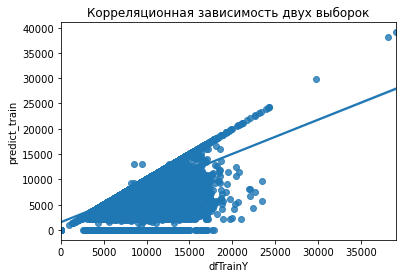

In [53]:
import seaborn as sns
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(dfTrainY, predict_train,data=df, fit_reg=True)
plt.xlabel('dfTrainY')
plt.ylabel('predict_train')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [77]:
# место для кода

In [72]:
from sklearn import tree

In [73]:
VehOdo = np.array(df.VehOdo).reshape(-1,1)
MMRCurrentRetailAveragePrice = np.array(df.MMRCurrentRetailAveragePrice).reshape(-1,1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    VehOdo,
    MMRCurrentRetailAveragePrice,
    test_size = 0.2
)

In [75]:
model=tree.DecisionTreeClassifier(max_depth=20)

In [76]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [77]:
model.score(X_train, y_train)

0.15166306991402048

In [99]:
predicted_y = model.predict(X_test)
print(predicted_y)

[   0.    0. 8494. ... 3403.    0. 3265.]


In [79]:
print('Функция потерь: ',mean_squared_error(predicted_y, y_test))
print('Среднюю ошибка: ',mean_absolute_error(predicted_y, y_test))

Функция потерь:  51528892.2114133
Среднюю ошибка:  6136.313626087553


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [118]:
predictionProb=model.predict_proba(X_test)
print(predictionProb)

[[0.00792079 0.         0.         ... 0.         0.         0.        ]
 [0.025      0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00909091 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [119]:
predictionProb= [y_test[i] if predictionProb[i][0] > 0.007 else 1 for i in range(len(predictionProb))]
print(predictionProb)

[array([10233.]), array([7322.]), 1, 1, 1, 1, array([5224.]), 1, array([10303.]), array([8623.]), array([10393.]), 1, 1, array([8762.]), array([9374.]), array([6991.]), 1, array([5518.]), 1, 1, 1, array([13488.]), 1, array([13593.]), array([12690.]), 1, 1, 1, array([9992.]), 1, 1, array([0.]), array([11100.]), 1, array([7944.]), 1, 1, 1, 1, array([6646.]), array([11555.]), 1, 1, 1, 1, 1, array([4434.]), 1, 1, array([11608.]), array([12056.]), array([5767.]), 1, 1, 1, array([5430.]), 1, array([6711.]), array([6219.]), array([3992.]), 1, 1, 1, 1, 1, array([8290.]), 1, array([11550.]), 1, 1, 1, array([6907.]), 1, array([12194.]), array([8720.]), 1, 1, 1, 1, 1, array([10848.]), array([2543.]), 1, 1, 1, 1, 1, array([8870.]), 1, array([11608.]), array([15499.]), 1, 1, 1, array([11178.]), array([10921.]), 1, array([10456.]), 1, array([11407.]), array([4554.]), array([7021.]), 1, 1, 1, array([3258.]), array([11916.]), 1, 1, array([10776.]), array([7968.]), 1, 1, 1, 1, array([8720.]), array([78

In [120]:
# место для кода
print('Функция потерь: ',mean_squared_error(predictionProb, y_test))

Функция потерь:  50465572.412824556


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [117]:
153924563.16887033>54530593.7184900

True